# Collect data

In [1]:
import pandas as pd

symptoms_only_train_df = pd.read_csv("data/symptoms-only-train.csv")
symptoms_only_test_df = pd.read_csv("data/symptoms-only-test.csv")

symptoms_with_conditions_train_df = pd.read_csv(
    "data/symptoms-with-conditions-train.csv"
)
symptoms_with_conditions_test_df = pd.read_csv("data/symptoms-with-conditions-test.csv")

# Evaluate symptoms only performance

## Setup model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

symptomns_only_param_distributions = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "max_depth": [1, 3, 5, 7, 9, 11],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "bootstrap": [True, False],
}

symptomns_only_rfc = RandomForestClassifier()

symptomns_only_random_search = RandomizedSearchCV(
    estimator=symptomns_only_rfc,
    param_distributions=symptomns_only_param_distributions,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

## Arrange train and test data

In [25]:
(
    symptomns_only_X_train,
    symptomns_only_y_train,
    symptomns_only_X_test,
    symptomns_only_y_test,
) = (
    symptoms_only_train_df.drop("classificacaoFinal", axis=1),
    symptoms_only_train_df["classificacaoFinal"],
    symptoms_only_test_df.drop("classificacaoFinal", axis=1),
    symptoms_only_test_df["classificacaoFinal"],
)

## Find best model

In [44]:
symptomns_only_best_model = symptomns_only_random_search.fit(
    symptomns_only_X_train, symptomns_only_y_train
).best_estimator_

## Visualize confusion matrix

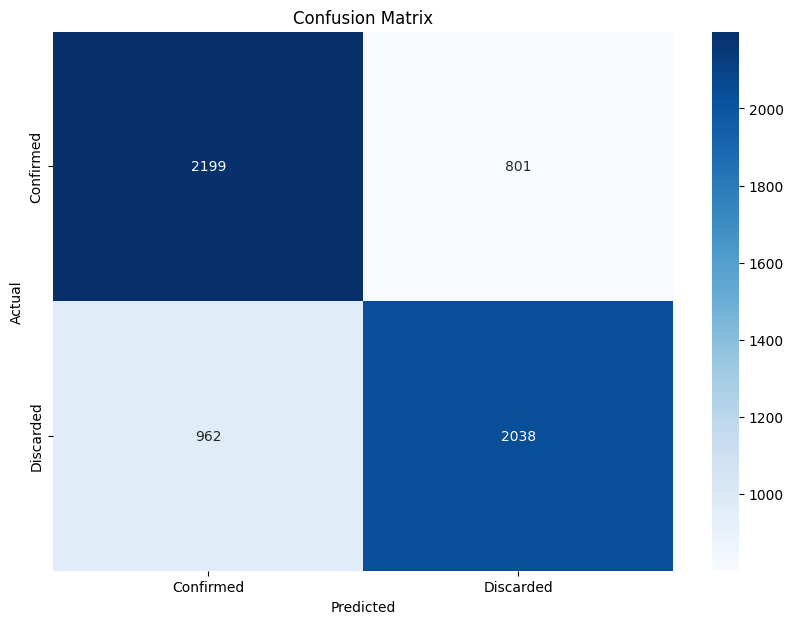

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

symptomns_only_y_pred = symptomns_only_best_model.predict(symptomns_only_X_test)

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_true=symptomns_only_y_test, y_pred=symptomns_only_y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Confirmed", "Discarded"],
    yticklabels=["Confirmed", "Discarded"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Visualize performance metrics radar

{'Accuracy': 70.61666666666667, 'Precision': 70.67621646745032, 'Recall': 70.61666666666667, 'F1 Score': 70.59549460599116, 'ROC AUC': np.float64(70.61666666666666)}


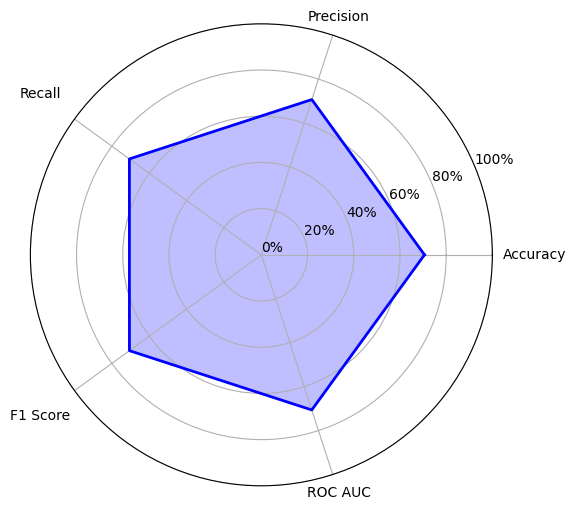

In [46]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

symptomns_only_report = classification_report(
    y_true=symptomns_only_y_test, y_pred=symptomns_only_y_pred, output_dict=True
)
symptomns_only_roc_auc = (
    roc_auc_score(symptomns_only_y_test, symptomns_only_y_pred) * 100
)

symptomns_only_metrics = {
    "Accuracy": symptomns_only_report["accuracy"] * 100,
    "Precision": symptomns_only_report["weighted avg"]["precision"] * 100,
    "Recall": symptomns_only_report["weighted avg"]["recall"] * 100,
    "F1 Score": symptomns_only_report["weighted avg"]["f1-score"] * 100,
    "ROC AUC": symptomns_only_roc_auc,
}

print(symptomns_only_metrics)

symptomns_only_labels = list(symptomns_only_metrics.keys())
symptomns_only_values = list(symptomns_only_metrics.values())

symptomns_only_angles = np.linspace(
    0, 2 * np.pi, len(symptomns_only_labels), endpoint=False
).tolist()

symptomns_only_values += symptomns_only_values[:1]
symptomns_only_angles += symptomns_only_angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(symptomns_only_angles, symptomns_only_values, color="blue", alpha=0.25)
ax.plot(symptomns_only_angles, symptomns_only_values, color="blue", linewidth=2)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f"{i}%" for i in np.arange(0, 101, 20)])
ax.set_xticks(symptomns_only_angles[:-1])
ax.set_xticklabels(
    symptomns_only_labels,
)

for label, angle in zip(ax.get_xticklabels(), symptomns_only_angles[:-1]):
    if label.get_text() in ["Accuracy", "Recall", "F1 Score"]:
        label.set_rotation(45)
        label.set_rotation_mode("anchor")
        label.set_va("center")
        label.set_ha("center")
        label.set_position((label.get_position()[0], label.get_position()[1] + -0.1))

plt.show()

# Evaluate symptoms with conditions performance

## Setup model

In [47]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

symptoms_with_conditions_param_distribuitons = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "max_depth": [1, 3, 5, 7, 9, 11],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "bootstrap": [True, False],
}


symptoms_with_conditions_rfc = RandomForestClassifier()

symptoms_with_conditions_random_search = RandomizedSearchCV(
    estimator=symptoms_with_conditions_rfc,
    param_distributions=symptoms_with_conditions_param_distribuitons,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

## Arrange train and test data

In [48]:
(
    symptoms_with_conditions_X_train,
    symptoms_with_conditions_y_train,
    symptoms_with_conditions_X_test,
    symptoms_with_conditions_y_test,
) = (
    symptoms_with_conditions_train_df.drop("classificacaoFinal", axis=1),
    symptoms_with_conditions_train_df["classificacaoFinal"],
    symptoms_with_conditions_test_df.drop("classificacaoFinal", axis=1),
    symptoms_with_conditions_test_df["classificacaoFinal"],
)

## Find best model

In [49]:
symptoms_with_conditions_best_model = symptoms_with_conditions_random_search.fit(
    symptoms_with_conditions_X_train, symptoms_with_conditions_y_train
).best_estimator_

## Visualize confusion matrix

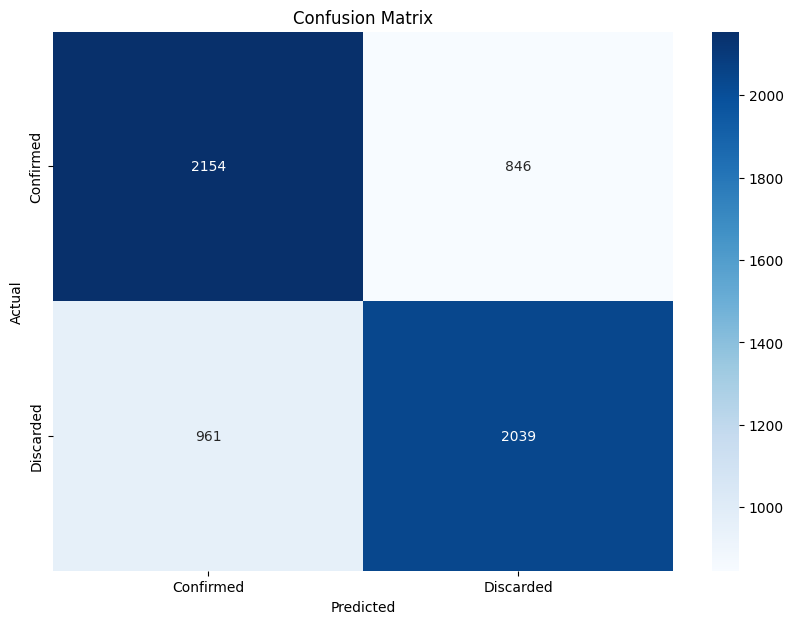

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

symptoms_with_conditions_y_pred = symptoms_with_conditions_best_model.predict(
    symptoms_with_conditions_X_test
)

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(
        y_true=symptoms_with_conditions_y_test, y_pred=symptoms_with_conditions_y_pred
    ),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Confirmed", "Discarded"],
    yticklabels=["Confirmed", "Discarded"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Visualize performance metrics radar

{'Accuracy': 69.88333333333333, 'Precision': 69.91259378364317, 'Recall': 69.88333333333333, 'F1 Score': 69.87226557533984, 'ROC AUC': np.float64(69.88333333333333)}


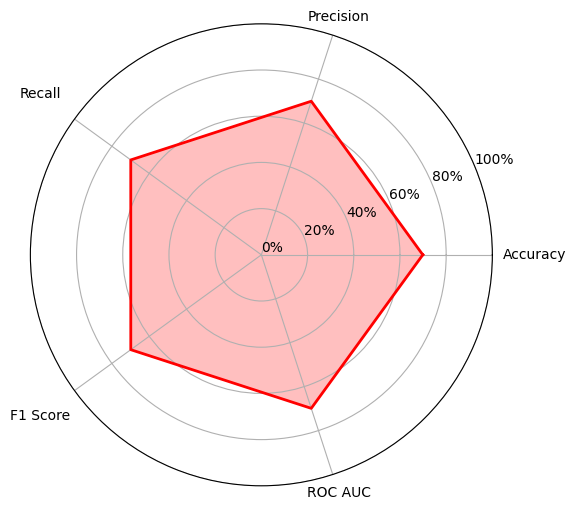

In [51]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

symptoms_with_conditions_report = classification_report(
    y_true=symptoms_with_conditions_y_test,
    y_pred=symptoms_with_conditions_y_pred,
    output_dict=True,
)
symptoms_with_conditions_roc_auc = (
    roc_auc_score(symptoms_with_conditions_y_test, symptoms_with_conditions_y_pred)
    * 100
)

symptoms_with_conditions_metrics = {
    "Accuracy": symptoms_with_conditions_report["accuracy"] * 100,
    "Precision": symptoms_with_conditions_report["weighted avg"]["precision"] * 100,
    "Recall": symptoms_with_conditions_report["weighted avg"]["recall"] * 100,
    "F1 Score": symptoms_with_conditions_report["weighted avg"]["f1-score"] * 100,
    "ROC AUC": symptoms_with_conditions_roc_auc,
}

print(symptoms_with_conditions_metrics)

symptoms_with_conditions_labels = list(symptoms_with_conditions_metrics.keys())
symptoms_with_conditions_values = list(symptoms_with_conditions_metrics.values())

symptoms_with_conditions_angles = np.linspace(
    0, 2 * np.pi, len(symptoms_with_conditions_labels), endpoint=False
).tolist()

symptoms_with_conditions_values += symptoms_with_conditions_values[:1]
symptoms_with_conditions_angles += symptoms_with_conditions_angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(
    symptoms_with_conditions_angles,
    symptoms_with_conditions_values,
    color="red",
    alpha=0.25,
)
ax.plot(
    symptoms_with_conditions_angles,
    symptoms_with_conditions_values,
    color="red",
    linewidth=2,
)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f"{i}%" for i in np.arange(0, 101, 20)])
ax.set_xticks(symptoms_with_conditions_angles[:-1])
ax.set_xticklabels(
    symptoms_with_conditions_labels,
)

for label, angle in zip(ax.get_xticklabels(), symptoms_with_conditions_angles[:-1]):
    if label.get_text() in ["Accuracy", "Recall", "F1 Score"]:
        label.set_rotation(45)
        label.set_rotation_mode("anchor")
        label.set_va("center")
        label.set_ha("center")
        label.set_position((label.get_position()[0], label.get_position()[1] + -0.1))

plt.show()

# Compare scenarios

## Visualize comparative performance metrics radar

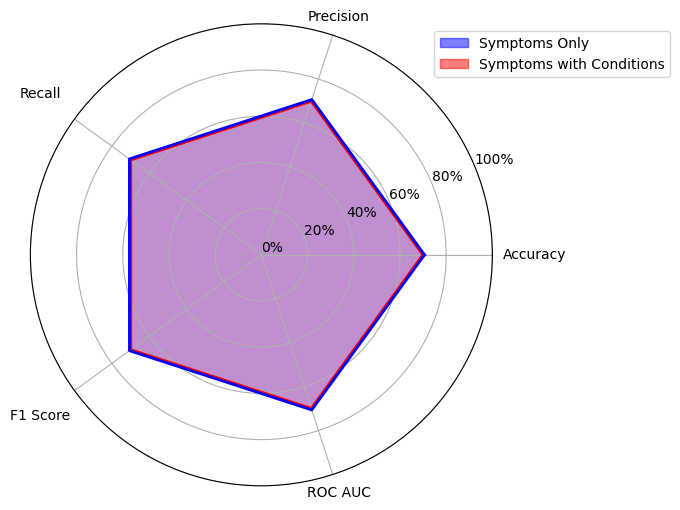

In [52]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(
    symptoms_with_conditions_angles,
    symptoms_with_conditions_values,
    color="red",
    alpha=0.25,
)
ax.plot(
    symptoms_with_conditions_angles,
    symptoms_with_conditions_values,
    color="red",
    linewidth=2,
)

ax.fill(symptomns_only_angles, symptomns_only_values, color="blue", alpha=0.25)
ax.plot(symptomns_only_angles, symptomns_only_values, color="blue", linewidth=2)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f"{i}%" for i in np.arange(0, 101, 20)])
ax.set_xticks(symptoms_with_conditions_angles[:-1])
ax.set_xticklabels(
    symptoms_with_conditions_labels,
)

for label, angle in zip(ax.get_xticklabels(), symptoms_with_conditions_angles[:-1]):
    if label.get_text() in ["Accuracy", "Recall", "F1 Score"]:
        label.set_rotation(45)
        label.set_rotation_mode("anchor")
        label.set_va("center")
        label.set_ha("center")
        label.set_position((label.get_position()[0], label.get_position()[1] + -0.1))

legend = plt.legend(
    handles=[
        Patch(facecolor="blue", edgecolor="blue", alpha=0.5, label="Symptoms Only"),
        Patch(facecolor="red", edgecolor="red", alpha=0.5, label="Symptoms with Conditions"),
    ],
    bbox_to_anchor=(1.4, 1),
)

plt.show()